In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import os



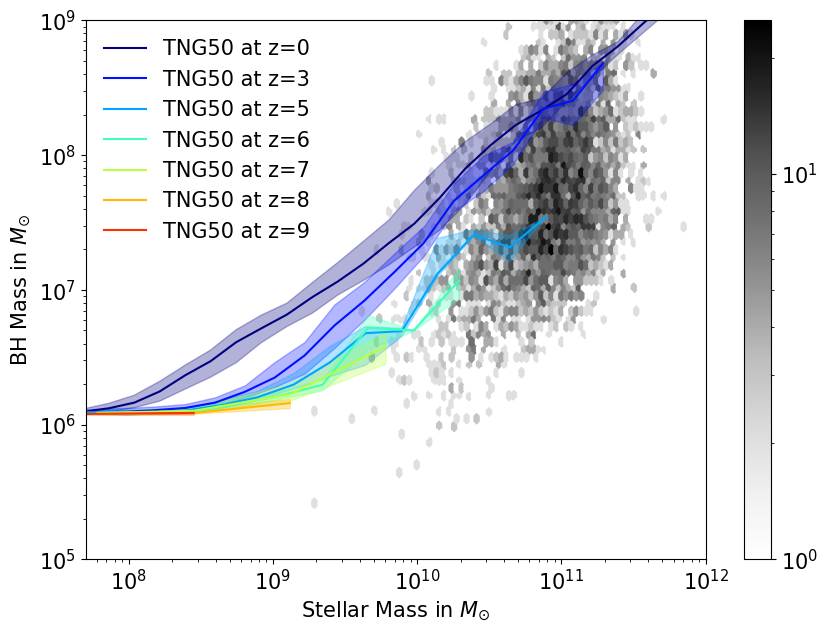

In [25]:
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams["font.size"] = (15)

sim_list = np.array(['TNG50'])
#snapshot_num = np.array([99])
snapshot_num = np.array([99,25,17,13,11,8,6,4])
snapshot_name = np.array(['z=0','z=3','z=5','z=6','z=7','z=8','z=9','z=10'])

snapshot_num = np.array([99,25,17,13,11,8,6])
snapshot_name = np.array(['z=0','z=3','z=5','z=6','z=7','z=8','z=9'])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])



x = 0
bins = [np.logspace(6,12,35),np.logspace(6,12,30),np.logspace(6,12,25),np.logspace(6,12,20),np.logspace(6,12,10),np.logspace(6,12,10),np.logspace(6,12,10),np.logspace(6,12,10)]
colors = plt.cm.jet(np.linspace(0,1,len(snapshot_num)+1))



df_data = pd.read_csv("Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
df_data['stellar mass'] = 10**(df_data['stellar mass'])
df_data['massBH'] = 10**(df_data['massBH'])
group_data = df_data.groupby(pd.cut(df_data['stellar mass'], bins[0]))
plot_centers_data = (bins[0] [:-1] + bins[0] [1:])/2
plot_values_data = group_data['massBH'].median()
pcm=plt.hexbin(df_data['stellar mass'], df_data['massBH'],xscale='log',yscale='log',cmap='Greys',bins='log')
#lower_q = group_data['massBH'].quantile(q=0.25)
#upper_q = group_data['massBH'].quantile(q=0.75)
#plt.fill_between(plot_centers_data, lower_q, upper_q ,alpha=0.3,color= 'black')





while x < len(snapshot_num):
    filename = str("Simulation Data/"+str(sim_list[0])+"/catalog_Habouzit_"+str(sim_list[0])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units_central.txt")
    
    df = pd.read_csv(filename,header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','central','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    df = df.loc[df['massBH']  != 0]

    group = df.groupby(pd.cut(df['stellar mass'], bins[x]))
    plot_centers = (bins[x] [:-1] + bins[x] [1:])/2
    plot_values = group['massBH'].median()
    plt.plot(plot_centers, plot_values, label=str(sim_list[0])+" at "+str(snapshot_name[x]), color= colors[x])
    #sdt = group['massBH'].std()
    #plt.fill_between(plot_centers, plot_values-sdt, plot_values+sdt ,alpha=0.3)
    lower_q = group['massBH'].quantile(q=0.25)
    upper_q = group['massBH'].quantile(q=0.75)
    plt.fill_between(plot_centers, lower_q, upper_q ,alpha=0.3, color= colors[x])
    x +=1


plt.xlabel(r'Stellar Mass in $M_{\odot}$')
plt.xlim([10**7.7, 10**12])
plt.ylim([1e5, 1e9])
plt.ylabel(r'BH Mass in $M_{\odot}$')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=15,frameon=False)
plt.colorbar(pcm)
plt.savefig('TNG50_BH_Stellar_mass_overtime.jpg')
plt.show()